# Proyek Klasifikasi Gambar: CIFAR-10 - Object Recognition in Images
- **Nama:** Renaldi Endrawan
- **Email:** mc129d5y1924@student.devacademy.id
- **ID Dicoding:** MC129D5Y1924

## Import Library


In [1]:
pip install tensorflowjs

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

## Load dan Preprocessing Dataset CIFAR-10


In [3]:
# Load dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Bagi dataset menjadi train dan validation (80% train, 20% val)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# Normalisasi dan preprocessing
x_train = preprocess_input(x_train.astype("float32"))
x_val = preprocess_input(x_val.astype("float32"))
x_test = preprocess_input(x_test.astype("float32"))

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# Daftar nama kelas
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

## Data Augmentation

In [4]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

## Visualisasi Data


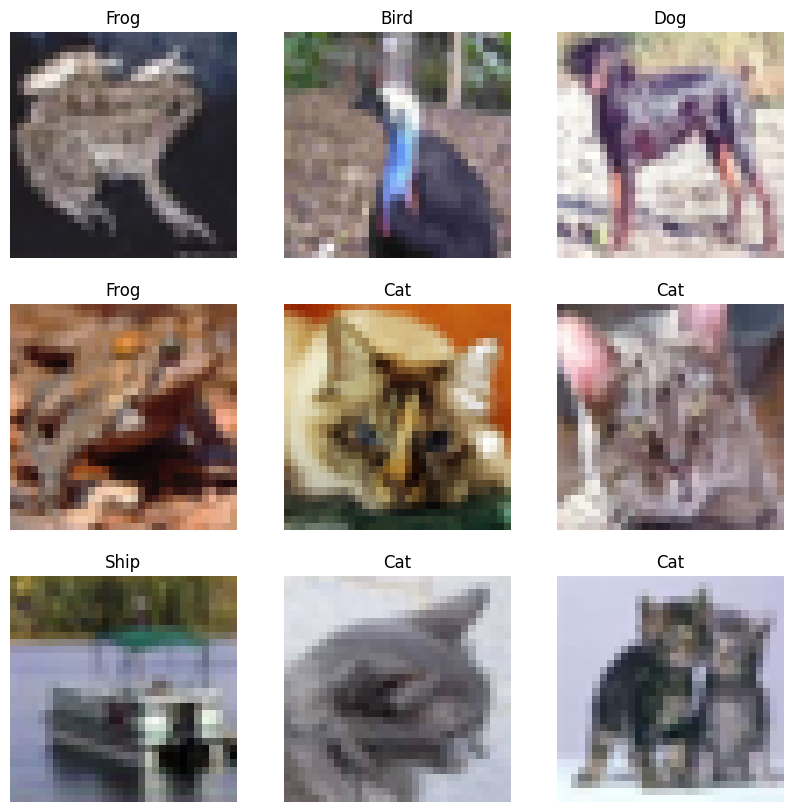

In [5]:
# Menampilkan 9 gambar pertama dari training set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow((x_train[i]+1)/2)
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

## Model Sequential + Conv2D + Pooling



In [7]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,198,602 (8.39 MB)

 Trainable params: 2,197,706 (8.38 MB)

 Non-trainable params: 896 (3.50 KB)

## Pelatihan Model


Callback 1: Early Stopping


In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Callback 2: Reduce LR on Plateau

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

Compile model

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Train model

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.2089 - loss: 2.2098 - val_accuracy: 0.3702 - val_loss: 1.6764
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.3116 - loss: 1.7472 - val_accuracy: 0.4446 - val_loss: 1.4766
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.4217 - loss: 1.5277 - val_accuracy: 0.5303 - val_loss: 1.4133
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5819 - loss: 1.1972 - val_accuracy: 0.6866 - val_loss: 0.9233
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6684 - loss: 0.9818 - val_accuracy: 0.7085 - val_loss: 0.8564
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.7121 - loss: 0.8620 - val_accuracy: 0.7012 - val_loss: 0.9574
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7465 - loss: 0.7605 - val_accuracy: 0.7581 - val_loss: 0.7172
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7642 - loss: 0.7072 - 

## Evaluasi Model


In [18]:
# Training & Validation Evaluation
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f'Akurasi Training Terakhir: {train_acc*100:.2f}%')
print(f'Akurasi Validation Terakhir: {val_acc*100:.2f}%')
print(f'Loss Training Terakhir: {train_loss:.4f}')
print(f'Loss Validation Terakhir: {val_loss:.4f}')

# Test Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Akurasi pada Test Set: {test_acc * 100:.2f}%')
print(f'Loss pada Test Set: {test_loss:.4f}')

Akurasi Training Terakhir: 90.00%
Akurasi Validation Terakhir: 84.89%
Loss Training Terakhir: 0.2997
Loss Validation Terakhir: 0.5489
313/313 - 1s - 4ms/step - accuracy: 0.8629 - loss: 0.4570
Akurasi pada Test Set: 86.29%
Loss pada Test Set: 0.4570


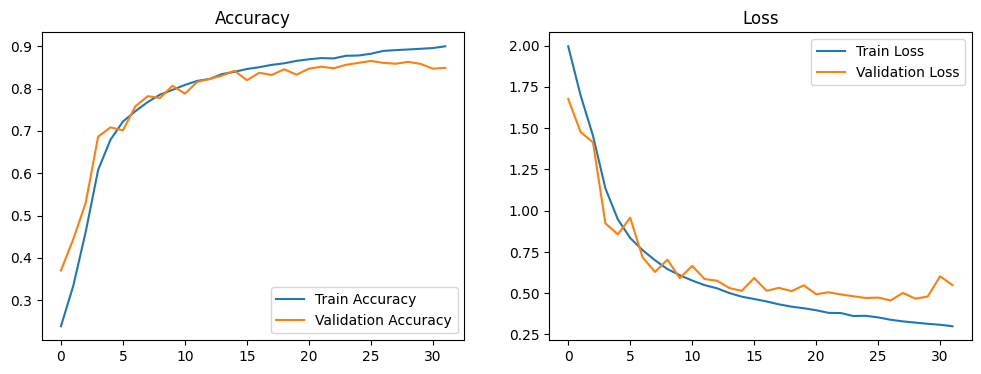

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


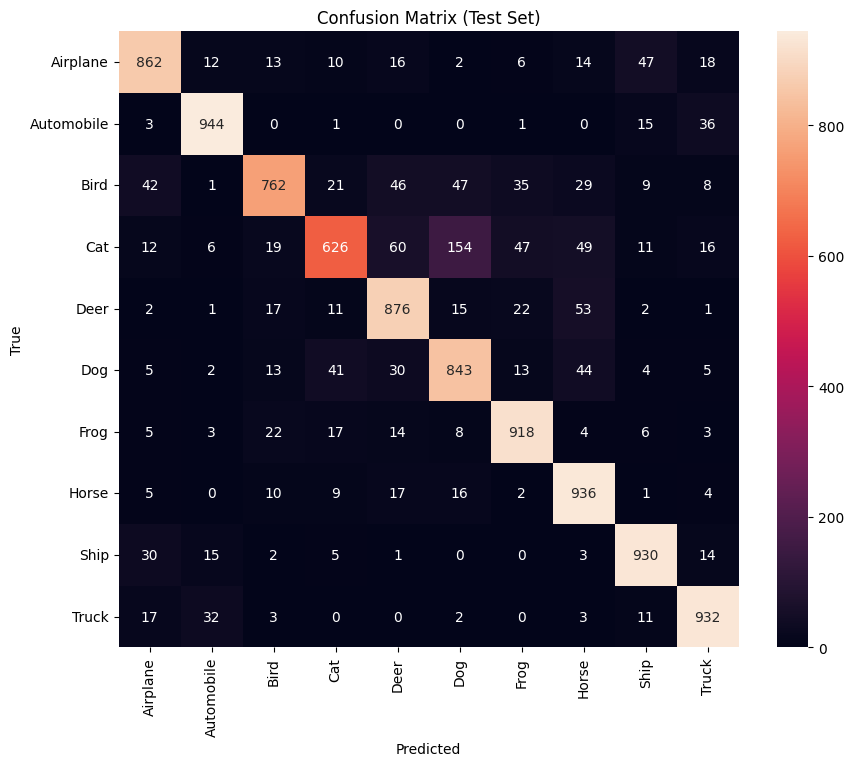

In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

## Save Model

In [21]:
# Path untuk masing-masing format
saved_model_path = "saved_model"
tflite_model_dir = "tflite_model"
tfjs_model_dir = "tfjs_model"

# Simpan model dalam format SavedModel
model.export(saved_model_path)

# Konversi dan simpan ke format TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

# Pastikan folder untuk TFLite ada
os.makedirs(tflite_model_dir, exist_ok=True)
with open(os.path.join(tflite_model_dir, "model.tflite"), "wb") as f:
    f.write(tflite_model)

# Konversi dan simpan ke format TensorFlow.js
os.system(f"tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model "
          f"--saved_model_tags=serve {saved_model_path} {tfjs_model_dir}")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_17')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137999672093840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137999672095376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138003542267984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138003542265680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137999672096144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138003542266256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138003542266448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138001483198736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138001483200848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138001483200080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138001483200272: 

0

## Fungsi Inference


In [22]:
# Load interpreter TFLite
interpreter = tf.lite.Interpreter(model_path="tflite_model/model.tflite")
interpreter.allocate_tensors()

# Ambil input dan output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def predict_tflite(image):
    """
    Inference menggunakan model TFLite.
    """
    img = preprocess_input(image.astype(np.float32))
    img = np.expand_dims(img, axis=0).astype(np.float32)

    interpreter.set_tensor(input_details[0]['index'], img)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])

    class_idx = np.argmax(output)
    return class_names[class_idx]

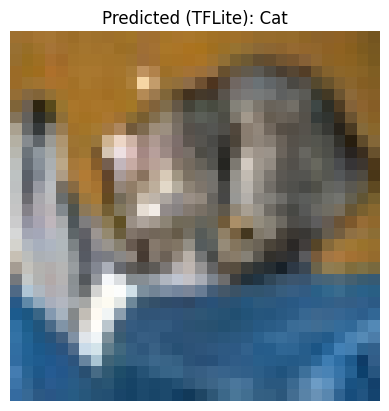

In [23]:
sample_image = x_test[0]
plt.imshow((sample_image + 1)/2)
plt.title("Predicted (TFLite): " + predict_tflite(sample_image))
plt.axis('off')
plt.show()